# Get started with Fused!!

Use the [Fused Python SDK](/python-sdk) to run a workflow in your favorite IDE, Jupyter Notebook, or Python environment.

## Fast Track ⏱️

Understand Fused in 5 interactive minutes!

This quick tutorial introduces key concepts and basic features of Fused to help you get started with your workflows!

## Concepts

Fused, as the name suggests, is a tool to fuse any data, with any tool, at any scale. At its core is the User Defined Function - the UDF. UDFs are the building blocks of composable geospatial operations. They are Python functions that Fused enhances with the ability to spatially filter access datasets of any size, run in a serverless cloud, and other benefits you'll learn about as you deepen in the ecosystem.

In this tutorial, you'll first install the Fused Python SDK and progressively write and run UDFs.

### Install the Fused Python SDK.

In [2]:
# !pip install fused -q

### Your first UDF

UDFs are Python functions that get superpowers with the `@fused.udf` decorator.

As a starting point, this cell shows how to declare a UDF and run it in your local environment with `fused.run`. Try running and modifying the UDF's code.

In [1]:
import fused


@fused.udf
def udf():
    return 42


fused.run(udf, engine="local")

42

### Run a community UDF

It's also possible to load UDFs stored in a different environment, which makes it easy to reproduce and reuse code.

This cell uses `fused.load` to import a UDF from the [UDF catalog GitHub repo](https://github.com/fusedio/udfs/tree/main).

In [5]:
import fused

udf = fused.load("https://github.com/fusedio/udfs/tree/main/public/DuckDB_NYC_Example")
gdf = fused.run(udf)
gdf.head()

,lng,lat,cnt,geometry,fused_index
0,-73.969667,40.800667,161,POINT (-73.96967 40.80067),0
1,-73.982000,40.757333,1281,POINT (-73.98200 40.75733),1
2,-73.987333,40.725000,1452,POINT (-73.98733 40.72500),2
3,-73.998000,40.720333,696,POINT (-73.99800 40.72033),3
4,-74.005333,40.740667,4268,POINT (-74.00533 40.74067),4


### Read data

Now, we need some data.

Fused runs any Python code, so you can leverage popular open source libraries like [GeoPandas](https://geopandas.org/en/stable/index.html) to interact with data.

This UDF shows an easy way to create a GeoDataFrame with census data hosted in a public catalog.


In [11]:
@fused.udf
def udf():
    import geopandas as gpd

    # Shape file as zip
    url = "https://www2.census.gov/geo/tiger/TIGER_RD18/STATE/11_DISTRICT_OF_COLUMBIA/11/tl_rd22_11_bg.zip"
    gdf = gpd.read_file(url)
    return gdf


gdf = fused.run(udf=udf, engine="local")
gdf.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,11,001,010800,1,110010108001,Block Group 1,G5030,S,112810,0,+38.9005669,-077.0474728,"POLYGON ((-77.05014 38.90033, -77.05013 38.900..."
1,11,001,010900,2,110010109002,Block Group 2,G5030,S,2270174,2933566,+38.8132364,-077.0238475,"POLYGON ((-77.03919 38.80050, -77.03913 38.800..."
2,11,001,007401,1,110010074011,Block Group 1,G5030,S,1029053,200980,+38.8668098,-076.9949201,"POLYGON ((-77.00540 38.86879, -77.00341 38.870..."
3,11,001,007403,1,110010074031,Block Group 1,G5030,S,126738,0,+38.8481009,-076.9774095,"POLYGON ((-76.98127 38.84662, -76.98098 38.846..."
4,11,001,007404,1,110010074041,Block Group 1,G5030,S,360630,0,+38.8514546,-076.9784997,"POLYGON ((-76.98334 38.85337, -76.98277 38.853..."


### Basic operations

You can use Fused to conduct basic geospatial operations on any size dataset. Here are some examples.

In [52]:
@fused.udf
def udf():
    import geopandas as gpd

    # Shape file as zip
    url = "https://www2.census.gov/geo/tiger/TIGER_RD18/STATE/11_DISTRICT_OF_COLUMBIA/11/tl_rd22_11_bg.zip"
    gdf = gpd.read_file(url)

    # Reproject Coordinate Reference System
    gdf = gdf.to_crs(epsg=3857)

    # Calculate areas
    gdf["area"] = gdf.area

    # Get centroid
    gdf["centroid"] = gdf.area

    # Calculate buffer
    gdf["buffered"] = gdf.buffer(0.0001)

    # Calculate convex hull
    gdf["convex_hull"] = gdf.convex_hull

    return gdf[["GEOID", "area", "centroid", "buffered", "convex_hull"]].head()


gdf = fused.run(udf=udf, engine="local")
gdf.head()

,GEOID,area,centroid,buffered,convex_hull
0,110010108001,1.865309e+05,1.865309e+05,"POLYGON ((-8577181.905 4707405.025, -8577181.9...","POLYGON ((-8577181.348 4707296.602, -8577181.9..."
1,110010109002,8.582903e+06,8.582903e+06,"POLYGON ((-8575963.513 4693134.492, -8575963.5...","POLYGON ((-8575942.919 4691870.298, -8575963.5..."
2,110010074011,2.031832e+06,2.031832e+06,"POLYGON ((-8572201.582 4702894.684, -8572201.5...","POLYGON ((-8571463.757 4701282.178, -8571905.0..."
3,110010074031,2.092521e+05,2.092521e+05,"POLYGON ((-8569516.111 4699724.528, -8569516.1...","POLYGON ((-8569447.649 4699551.296, -8569522.6..."
4,110010074041,5.954784e+05,5.954784e+05,"POLYGON ((-8569745.986 4700689.222, -8569745.9...","POLYGON ((-8569408.688 4699765.406, -8569745.9..."


<Axes: >

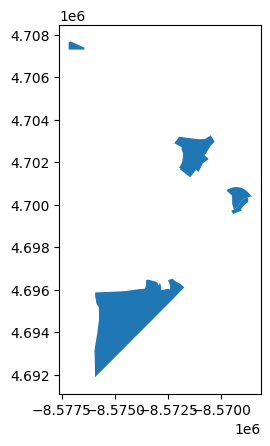

In [53]:
gdf.buffered.plot()

### Spatial filtering ⚡

At this point, you might be asking: why would I use Fused to run basic spatial operations?

Fused gives your Python functions the ability to spatially filter dataset. It uses the `bbox` to perform a spatial query and return only the piece of data needed for the analysis. 

When you run a UDF in parallel and on a serverless `realtime` engine, you suddenly have the ability to run simple Python code over datasets of any size. This takes you from code to map, instantly.


In [2]:
@fused.udf
def udf(bbox):
    table_path = "s3://fused-asset/infra/building_msft_us"
    utils = fused.load(
        "https://github.com/fusedio/udfs/tree/f928ee1/public/common/"
    ).utils
    gdf = utils.table_to_tile(bbox, table=table_path)

    # Calculate buffer
    return gdf.buffer(0.0001)


gdf = fused.run(udf=udf, x=9648, y=12320, z=15, engine="local")
gdf.head()

2024-04-01 15:17:37.396 | DEBUG    | fused.core._cache:_cache:130 - Error [Errno 2] No such file or directory: '/tmp/cached_data/table_to_tile/data_2c20b1934b9bd13998c56a9336ff2df4245bf1ca72730ac9d792f4c453387f68'. Retrying.


9648 12320 15


235    POLYGON ((-73.99783 40.70978, -73.99785 40.709...
239    POLYGON ((-73.99870 40.71098, -73.99864 40.711...
250    POLYGON ((-74.00152 40.70789, -74.00182 40.708...
253    POLYGON ((-74.00438 40.70812, -74.00438 40.708...
254    POLYGON ((-74.00429 40.70665, -74.00391 40.706...
dtype: geometry

<Axes: >

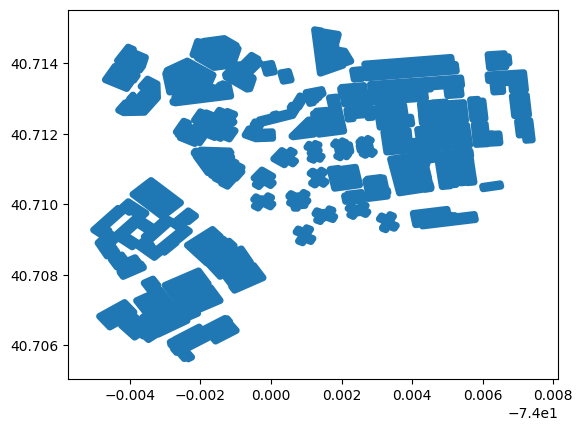

In [3]:
gdf.plot()

## What's next?


Congratulations! You're off to a great start with Fused. 🎉

With Fused you can do much more than what has been introduced so far, from loading data from [Google Earth Engine](/basics/in/gee/) and [DuckDB](/basics/in/duckdb/), operations with [rasters](/basics/transform/raster/) and [vectors](/basics/transform/vector/), to exporting data into [Lonboard](/basics/out/lonboard/) and [Streamlit](/basics/out/streamlit/), and [much more](/basics/tutorials/). Head over to the [Python SDK documentation](/python-sdk/) to learn more about what's possible and join the community on [Discord](https://bit.ly/fused-discord).

Once you feel ready, we invite you to [share the UDFs you create with the community](/contribute/)!

Welcome aboard! 🚢

